Parámetros calculados: τ (retraso) = 18, m (dimensión) = 3


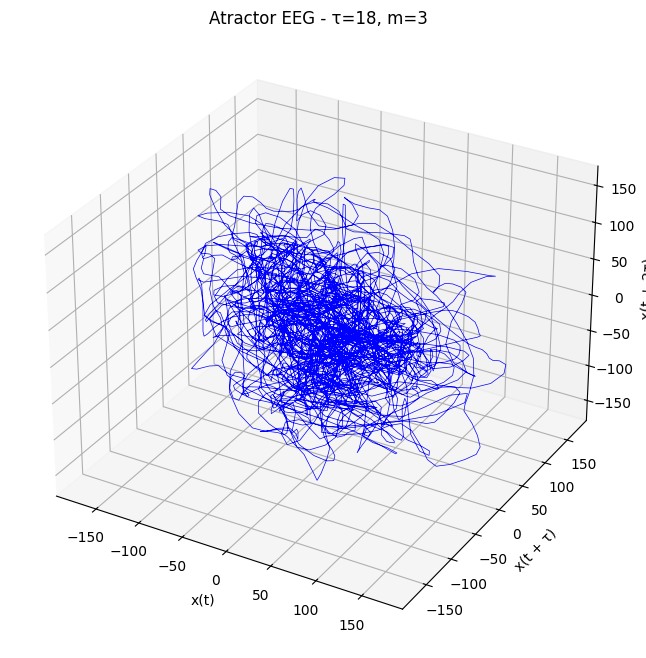

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 5. Visualizar en 3D ---
def plot_attractor_3d(embedded, title="Atractor EEG"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='blue')
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.show()

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/E4/E4_1.txt" 
    eeg_signal = load_eeg_from_txt(file_path)
    
    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    plot_attractor_3d(embedded, title=f"Atractor EEG - τ={tau}, m={m}")

Parámetros calculados: τ (retraso) = 42, m (dimensión) = 3


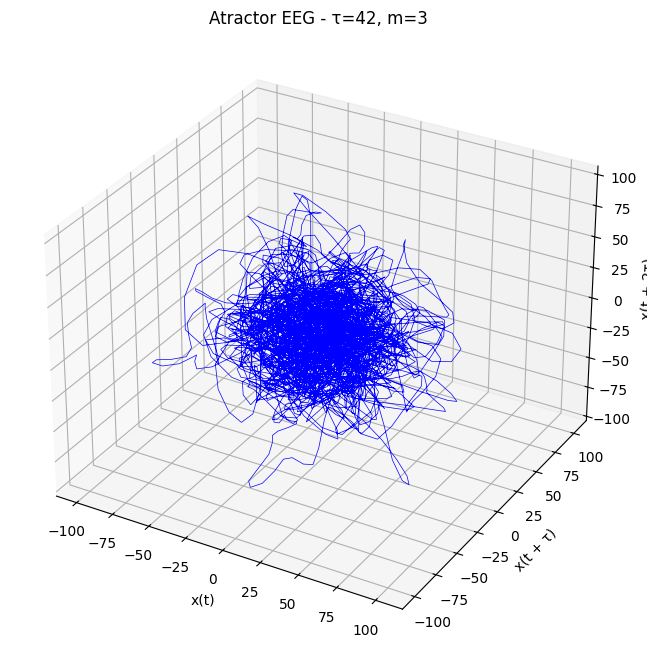

NameError: name 'plot_attractor_2d' is not defined

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 5. Visualizar en 3D ---
def plot_attractor_3d(embedded, title="Atractor EEG"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='blue')
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.show()

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/H4/H4_1.txt" 
    eeg_signal = load_eeg_from_txt(file_path)
    
    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    plot_attractor_3d(embedded, title=f"Atractor EEG - τ={tau}, m={m}")

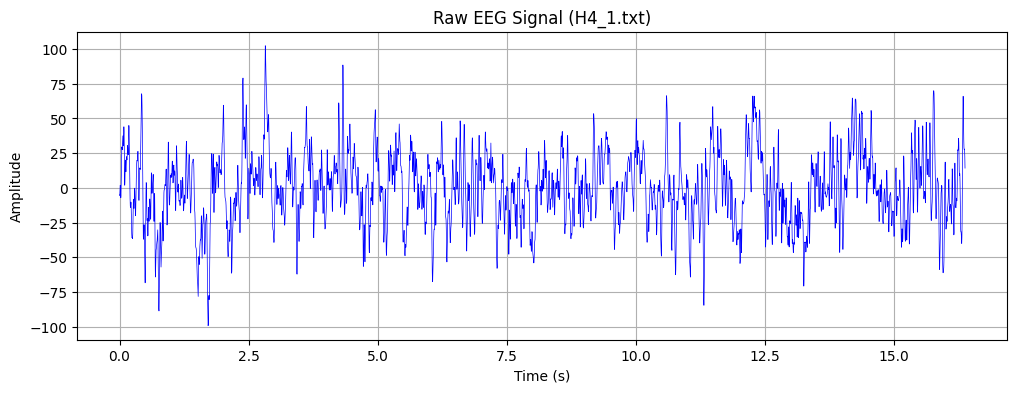

Embedding parameters: τ = 42, m = 3
Could not calculate Lyapunov exponent: lyap_r() got an unexpected keyword argument 'min_nb'


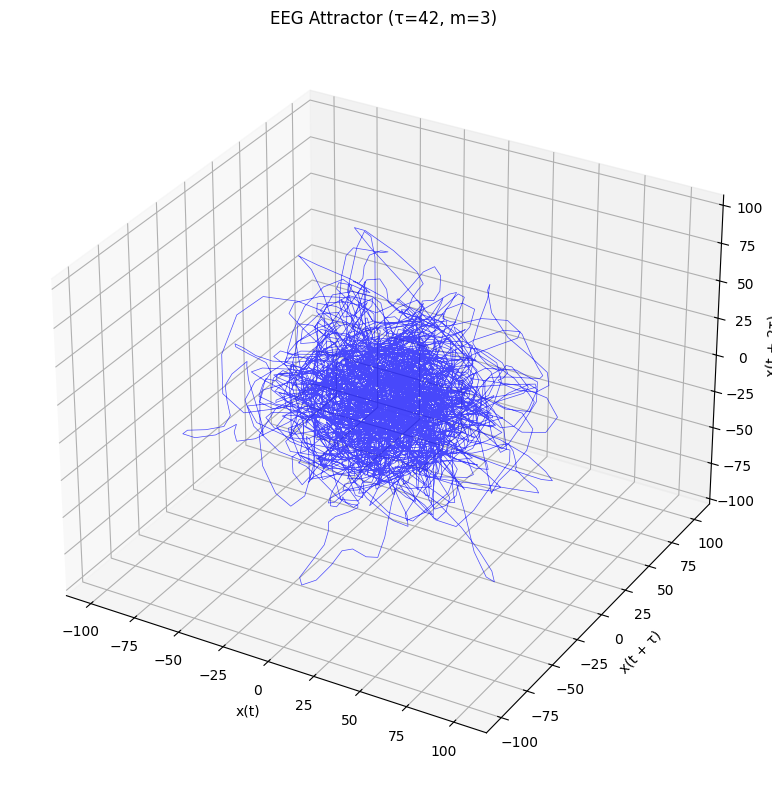

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from nolds import lyap_r  # For Lyapunov exponent calculation

# --- 1. Load EEG signal ---
def load_eeg_from_txt(file_path):
    """Load EEG signal from text file"""
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Plot raw EEG signal ---
def plot_eeg_signal(signal, title="EEG Signal", fs=250):
    """Plot the raw EEG time series"""
    plt.figure(figsize=(12, 4))
    time = np.arange(len(signal)) / fs
    plt.plot(time, signal, 'b-', lw=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- 3. Calculate τ with autocorrelation ---
def calculate_tau(signal, max_tau=100):
    """Calculate time delay using autocorrelation"""
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Positive lags
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return int(min(tau, max_tau))  # Ensure integer output

# --- 4. Calculate m with FNN ---
def estimate_m(signal, tau, max_m=10):
    """Calculate embedding dimension with False Nearest Neighbors"""
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return int(max(m_opt, 3))  # Ensure integer and m ≥ 3 for 3D visualization

# --- 5. Reconstruct attractor ---
def reconstruct_attractor(signal, tau, m):
    """Reconstruct phase space using time-delay embedding"""
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 6. Calculate Largest Lyapunov Exponent ---
def calculate_lyapunov(signal, tau, m):
    """Calculate the largest Lyapunov exponent"""
    # Ensure parameters are integers
    tau_int = int(tau)
    m_int = int(m)
    
    # Use the first component for Lyapunov calculation
    return lyap_r(signal, emb_dim=m_int, tau=tau_int, min_nb=None, min_tsep=0, lag=tau_int)

# --- 7. Plot 3D attractor ---
def plot_attractor_3d(embedded, title="EEG Attractor"):
    """Visualize attractor in 3D space"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], 
            lw=0.5, color='blue', alpha=0.7)
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# --- MAIN PROGRAM ---
if __name__ == "__main__":
    # Configuration
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/H4/H4_1.txt"
    
    # 1. Load EEG data
    eeg_signal = load_eeg_from_txt(file_path)
    
    # 2. Plot raw EEG signal
    plot_eeg_signal(eeg_signal, title="Raw EEG Signal (H4_1.txt)")
    
    # 3. Calculate embedding parameters
    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Embedding parameters: τ = {tau}, m = {m}")
    
    # 4. Calculate Largest Lyapunov Exponent
    try:
        λ = calculate_lyapunov(eeg_signal, tau, m)
        print(f"Largest Lyapunov exponent: {λ:.4f}")
        plot_title = f"EEG Attractor (τ={tau}, m={m}, λ={λ:.2f})"
    except Exception as e:
        print(f"Could not calculate Lyapunov exponent: {str(e)}")
        λ = None
        plot_title = f"EEG Attractor (τ={tau}, m={m})"
    
    # 5. Reconstruct and plot attractor
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    plot_attractor_3d(embedded, title=plot_title)

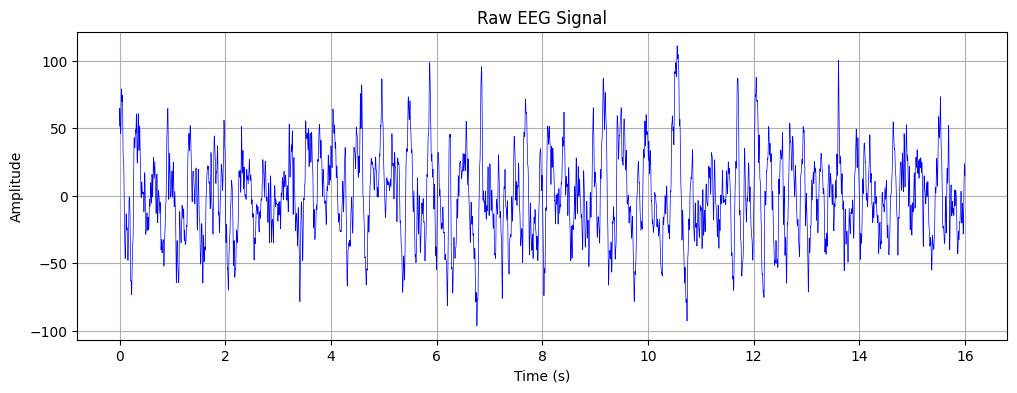

Parameters: τ (delay) = 18, m (embedding dim) = 3
Largest Lyapunov Exponent: 0.0145


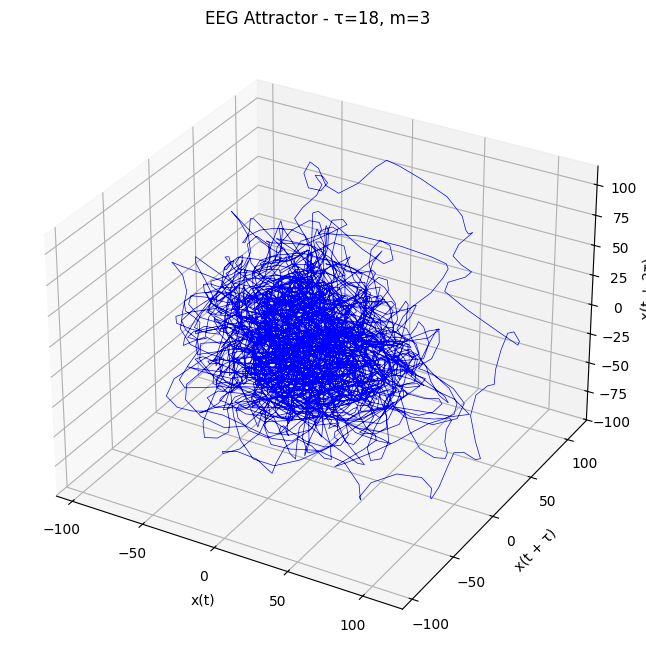

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Load EEG signal ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Plot raw EEG signal ---
def plot_eeg_signal(signal, title="Raw EEG Signal", fs=256):
    time = np.arange(len(signal)) / fs  # Assume sampling rate=256 Hz if not specified
    plt.figure(figsize=(12, 4))
    plt.plot(time, signal, lw=0.5, color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- 3. Calculate τ with autocorrelation ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Positive lags
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)

# --- 4. Calculate m with FNN ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)

# --- 5. Reconstruct attractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 6. Compute Largest Lyapunov Exponent (Rosenstein's algorithm) ---
def largest_lyapunov_exponent(signal, tau, m, window=10):
    embedded = reconstruct_attractor(signal, tau, m)
    n_points = len(embedded)
    
    # Find nearest neighbors (exclude immediate neighbors)
    nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
    distances, indices = nbrs.kneighbors(embedded)
    
    # Filter out trivial neighbors (too close in time)
    valid_pairs = [i for i in range(n_points) if abs(indices[i, 1] - i) > window]
    if not valid_pairs:
        return np.nan
    
    # Compute divergence rates
    divergences = []
    for i in valid_pairs:
        initial_dist = np.linalg.norm(embedded[i] - embedded[indices[i, 1]])
        if initial_dist == 0:
            continue
        max_iter = min(window, n_points - max(i, indices[i, 1]))
        if max_iter <= 0:
            continue
        dist_evolution = [np.linalg.norm(embedded[i + k] - embedded[indices[i, 1] + k]) 
                          for k in range(max_iter)]
        if len(dist_evolution) == 0:
            continue
        divergences.append(np.log(dist_evolution[-1] / initial_dist))
    
    if not divergences:
        return np.nan
    
    return np.mean(divergences) / (tau * window)  # Normalize by time

# --- 7. Plot 3D attractor ---
def plot_attractor_3d(embedded, title="EEG Attractor"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='blue')
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.show()

# --- MAIN PROGRAM ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/E4/E4_4.txt" 
    eeg_signal = load_eeg_from_txt(file_path)
    
    # Plot raw EEG signal
    plot_eeg_signal(eeg_signal)
    
    # Calculate parameters
    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parameters: τ (delay) = {tau}, m (embedding dim) = {m}")
    
    # Reconstruct attractor
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    
    # Compute Largest Lyapunov Exponent
    lle = largest_lyapunov_exponent(eeg_signal, tau, m)
    print(f"Largest Lyapunov Exponent: {lle:.4f}")
    
    # Plot attractor
    plot_attractor_3d(embedded, title=f"EEG Attractor - τ={tau}, m={m}")

Parámetros óptimos del Rössler: a=0.100, b=0.300, c=5.694


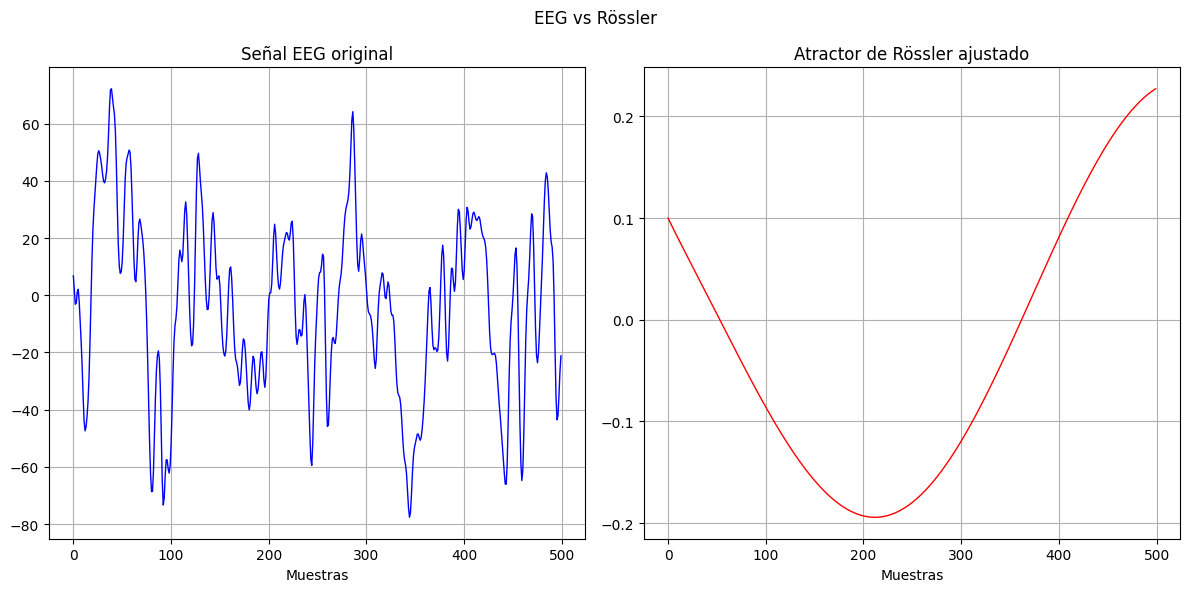

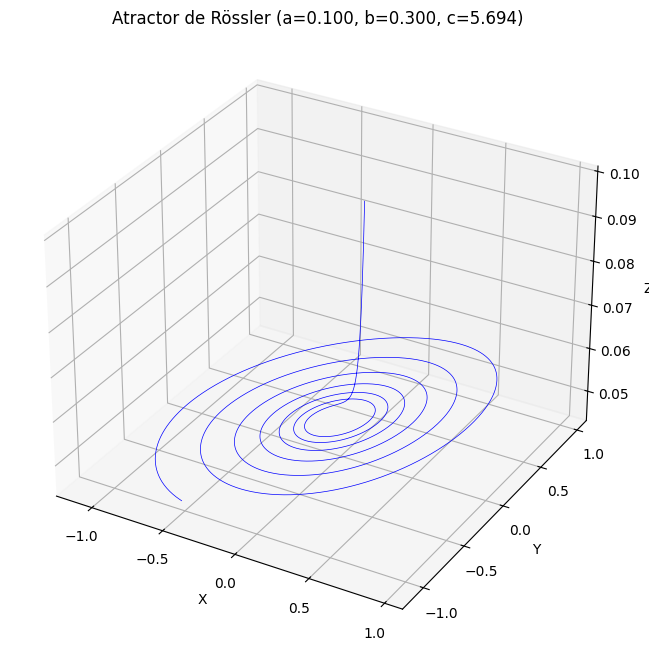

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import MinMaxScaler

# --- 1. Cargar señal EEG ---
def load_eeg(file_path):
    """Lee un archivo .txt con la señal EEG."""
    with open(file_path, 'r') as file:
        eeg = np.loadtxt(file)
    return eeg

# --- 2. Simular Atractor de Rössler ---
def rossler_system(u, t, a, b, c):
    """Ecuaciones del atractor de Rössler."""
    x, y, z = u
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

def simulate_rossler(a=0.2, b=0.2, c=5.7, t_max=100, dt=0.01):
    """Simula el atractor con parámetros dados."""
    t = np.arange(0, t_max, dt)
    u0 = [0.1, 0.1, 0.1]  # Condiciones iniciales
    sol = odeint(rossler_system, u0, t, args=(a, b, c))
    return sol, t

# --- 3. Ajustar parámetros del Rössler al EEG ---
def fit_rossler_to_eeg(eeg, a_range=(0.1, 0.3), b_range=(0.1, 0.3), c_range=(5, 6)):
    """Busca parámetros (a, b, c) que minimicen la diferencia con el EEG."""
    from scipy.optimize import minimize
    scaler = MinMaxScaler()
    eeg_scaled = scaler.fit_transform(eeg.reshape(-1, 1)).flatten()
    
    def error(params):
        a, b, c = params
        rossler, _ = simulate_rossler(a, b, c, t_max=len(eeg)*0.01, dt=0.01)
        rossler_scaled = scaler.transform(rossler[:, 0].reshape(-1, 1)).flatten()
        return np.mean((eeg_scaled[:len(rossler_scaled)] - rossler_scaled)**2)
    
    initial_guess = [0.2, 0.2, 5.7]
    bounds = [a_range, b_range, c_range]
    result = minimize(error, initial_guess, bounds=bounds)
    return result.x  # Parámetros óptimos (a, b, c)

# --- 4. Visualización ---
def plot_comparison(eeg, rossler, title="EEG vs Rössler"):
    """Compara la señal EEG con el atractor de Rössler ajustado."""
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(eeg[:500], 'b-', lw=1, label="EEG")
    plt.title("Señal EEG original")
    plt.xlabel("Muestras")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(rossler[:500, 0], 'r-', lw=1, label="Rössler (x)")
    plt.title("Atractor de Rössler ajustado")
    plt.xlabel("Muestras")
    plt.grid(True)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    # --- Cargar EEG ---
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/E4/E4_11.txt" # ¡Cambia esto!
    eeg = load_eeg(file_path)
    
    # --- Ajustar Rössler al EEG ---
    a_opt, b_opt, c_opt = fit_rossler_to_eeg(eeg)
    print(f"Parámetros óptimos del Rössler: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")
    
    # --- Simular Rössler con parámetros ajustados ---
    rossler, t = simulate_rossler(a_opt, b_opt, c_opt, t_max=len(eeg)*0.01, dt=0.01)
    
    # --- Visualizar comparación ---
    plot_comparison(eeg, rossler)
    
    # --- Graficar atractor en 3D ---
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(rossler[:, 0], rossler[:, 1], rossler[:, 2], 'b-', lw=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"Atractor de Rössler (a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f})")
    plt.show()

Parámetros óptimos del Rössler: a=0.100, b=0.100, c=5.701


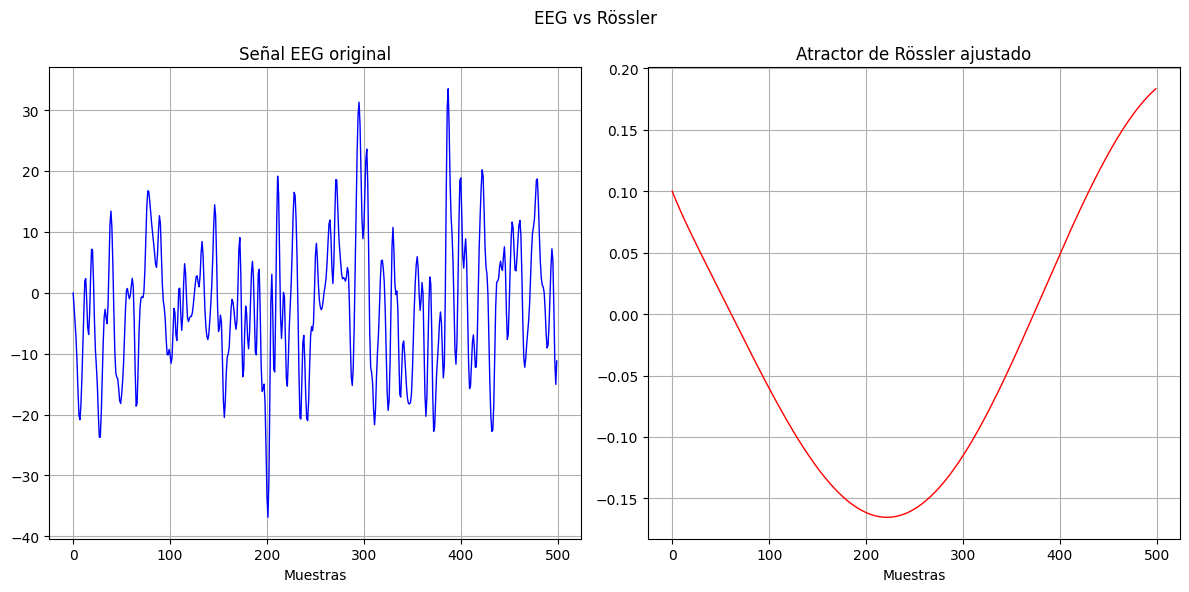

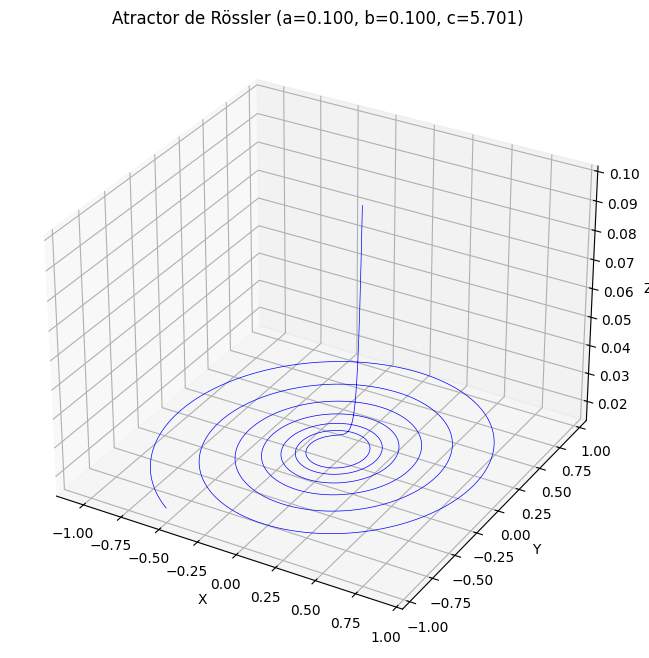

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import MinMaxScaler

# --- 1. Cargar señal EEG ---
def load_eeg(file_path):
    """Lee un archivo .txt con la señal EEG."""
    with open(file_path, 'r') as file:
        eeg = np.loadtxt(file)
    return eeg

# --- 2. Simular Atractor de Rössler ---
def rossler_system(u, t, a, b, c):
    """Ecuaciones del atractor de Rössler."""
    x, y, z = u
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

def simulate_rossler(a=0.2, b=0.2, c=5.7, t_max=100, dt=0.01):
    """Simula el atractor con parámetros dados."""
    t = np.arange(0, t_max, dt)
    u0 = [0.1, 0.1, 0.1]  # Condiciones iniciales
    sol = odeint(rossler_system, u0, t, args=(a, b, c))
    return sol, t

# --- 3. Ajustar parámetros del Rössler al EEG ---
def fit_rossler_to_eeg(eeg, a_range=(0.1, 0.3), b_range=(0.1, 0.3), c_range=(5, 6)):
    """Busca parámetros (a, b, c) que minimicen la diferencia con el EEG."""
    from scipy.optimize import minimize
    scaler = MinMaxScaler()
    eeg_scaled = scaler.fit_transform(eeg.reshape(-1, 1)).flatten()
    
    def error(params):
        a, b, c = params
        rossler, _ = simulate_rossler(a, b, c, t_max=len(eeg)*0.01, dt=0.01)
        rossler_scaled = scaler.transform(rossler[:, 0].reshape(-1, 1)).flatten()
        return np.mean((eeg_scaled[:len(rossler_scaled)] - rossler_scaled)**2)
    
    initial_guess = [0.2, 0.2, 5.7]
    bounds = [a_range, b_range, c_range]
    result = minimize(error, initial_guess, bounds=bounds)
    return result.x  # Parámetros óptimos (a, b, c)

# --- 4. Visualización ---
def plot_comparison(eeg, rossler, title="EEG vs Rössler"):
    """Compara la señal EEG con el atractor de Rössler ajustado."""
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(eeg[:500], 'b-', lw=1, label="EEG")
    plt.title("Señal EEG original")
    plt.xlabel("Muestras")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(rossler[:500, 0], 'r-', lw=1, label="Rössler (x)")
    plt.title("Atractor de Rössler ajustado")
    plt.xlabel("Muestras")
    plt.grid(True)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    # --- Cargar EEG ---
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/H4/H4_11.txt" # ¡Cambia esto!
    eeg = load_eeg(file_path)
    
    # --- Ajustar Rössler al EEG ---
    a_opt, b_opt, c_opt = fit_rossler_to_eeg(eeg)
    print(f"Parámetros óptimos del Rössler: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")
    
    # --- Simular Rössler con parámetros ajustados ---
    rossler, t = simulate_rossler(a_opt, b_opt, c_opt, t_max=len(eeg)*0.01, dt=0.01)
    
    # --- Visualizar comparación ---
    plot_comparison(eeg, rossler)
    
    # --- Graficar atractor en 3D ---
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(rossler[:, 0], rossler[:, 1], rossler[:, 2], 'b-', lw=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"Atractor de Rössler (a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f})")
    plt.show()

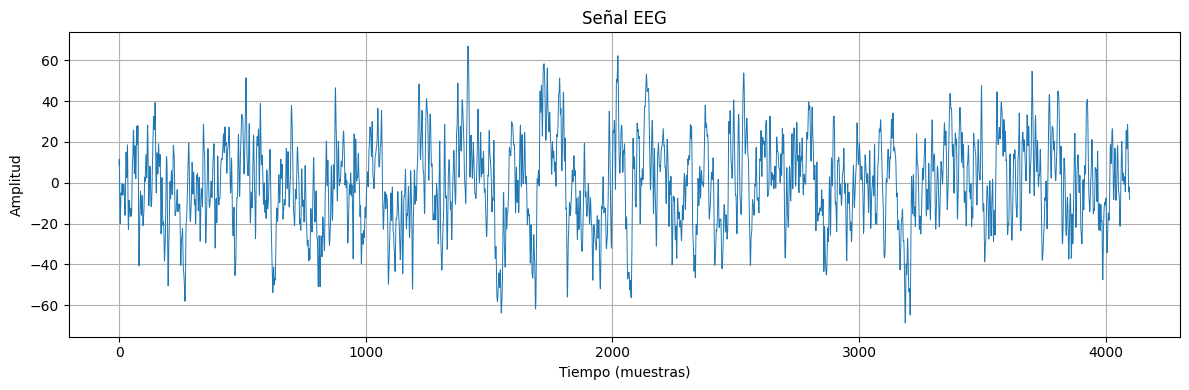

Parámetros calculados: τ (retraso) = 41, m (dimensión) = 3


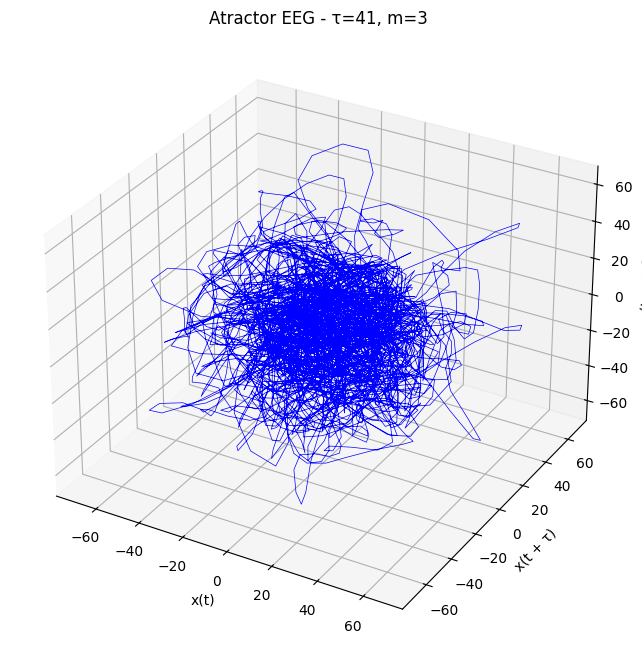

Exponente de Lyapunov estimado: 0.0034


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 5. Visualizar señal EEG ---
def plot_eeg_signal(signal, title="Señal EEG"):
    plt.figure(figsize=(12, 4))
    plt.plot(signal, lw=0.7)
    plt.title(title)
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- 6. Visualizar atractor en 3D ---
def plot_attractor_3d(embedded, title="Atractor EEG"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='blue')
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.show()

# --- 7. Calcular el exponente de Lyapunov (método de Rosenstein) ---
def lyapunov_exponent(embedded, tau, fs=1):
    N = len(embedded)
    k = 1  # Solo el vecino más cercano
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(embedded)
    distances, indices = nbrs.kneighbors(embedded)
    
    ln_divergence = []
    for j in range(1, min(100, N // 2)):  # Límite superior de iteraciones
        divs = []
        for i in range(N - j):
            nn_idx = indices[i][1]
            if abs(i - nn_idx) > tau:  # Evitar vecinos temporales
                if i + j < N and nn_idx + j < N:
                    dist = np.linalg.norm(embedded[i + j] - embedded[nn_idx + j])
                    if dist > 0:
                        divs.append(np.log(dist))
        if divs:
            ln_divergence.append(np.mean(divs))
        else:
            ln_divergence.append(0)

    ln_divergence = np.array(ln_divergence)
    t = np.arange(len(ln_divergence)) / fs
    linear_region = slice(5, 25)
    coeffs = np.polyfit(t[linear_region], ln_divergence[linear_region], 1)
    l_exp = coeffs[0]
    
    return l_exp

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/H4/H4_20.txt" 
    eeg_signal = load_eeg_from_txt(file_path)
    
    # Mostrar señal EEG
    plot_eeg_signal(eeg_signal)

    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    plot_attractor_3d(embedded, title=f"Atractor EEG - τ={tau}, m={m}")
    
    l_exp = lyapunov_exponent(embedded, tau)
    print(f"Exponente de Lyapunov estimado: {l_exp:.4f}")


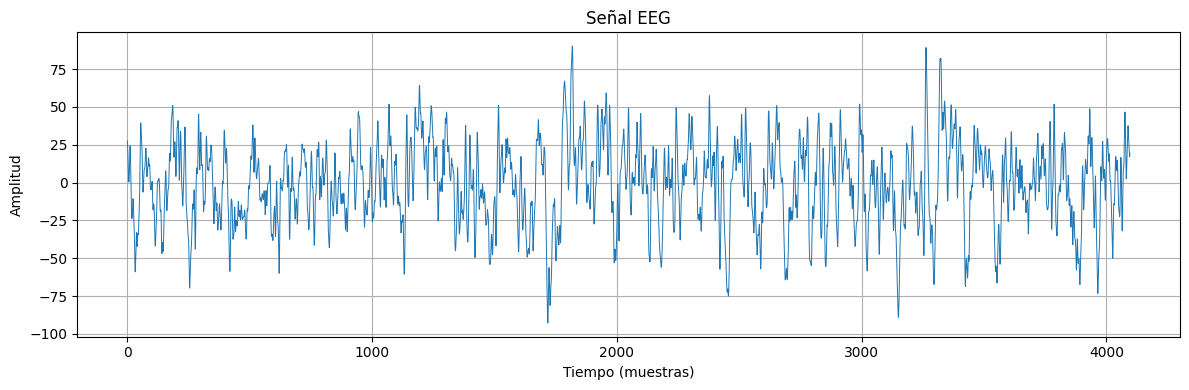

Parámetros calculados: τ (retraso) = 26, m (dimensión) = 3


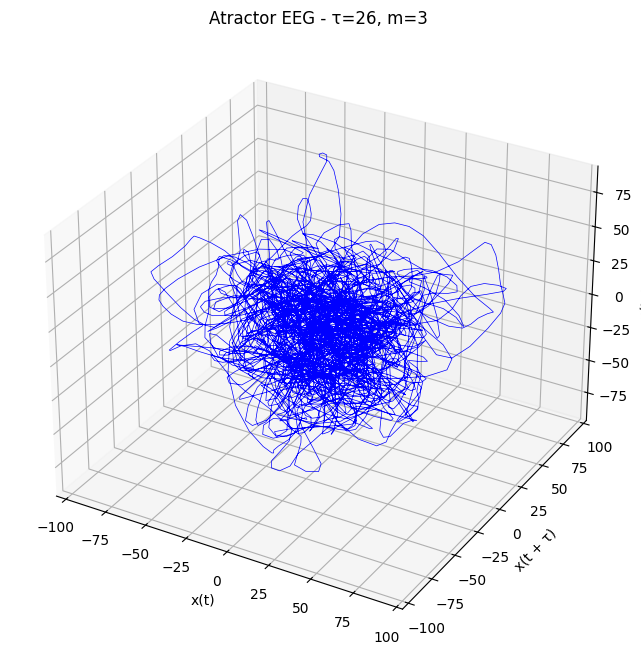

Exponente de Lyapunov estimado: -0.0149


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

# --- 5. Visualizar señal EEG ---
def plot_eeg_signal(signal, title="Señal EEG"):
    plt.figure(figsize=(12, 4))
    plt.plot(signal, lw=0.7)
    plt.title(title)
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- 6. Visualizar atractor en 3D ---
def plot_attractor_3d(embedded, title="Atractor EEG"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='blue')
    ax.set_xlabel('x(t)')
    ax.set_ylabel('x(t + τ)')
    ax.set_zlabel('x(t + 2τ)')
    ax.set_title(title)
    plt.show()

# --- 7. Calcular el exponente de Lyapunov (método de Rosenstein) ---
def lyapunov_exponent(embedded, tau, fs=1):
    N = len(embedded)
    k = 1  # Solo el vecino más cercano
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(embedded)
    distances, indices = nbrs.kneighbors(embedded)
    
    ln_divergence = []
    for j in range(1, min(100, N // 2)):  # Límite superior de iteraciones
        divs = []
        for i in range(N - j):
            nn_idx = indices[i][1]
            if abs(i - nn_idx) > tau:  # Evitar vecinos temporales
                if i + j < N and nn_idx + j < N:
                    dist = np.linalg.norm(embedded[i + j] - embedded[nn_idx + j])
                    if dist > 0:
                        divs.append(np.log(dist))
        if divs:
            ln_divergence.append(np.mean(divs))
        else:
            ln_divergence.append(0)

    ln_divergence = np.array(ln_divergence)
    t = np.arange(len(ln_divergence)) / fs
    linear_region = slice(5, 25)
    coeffs = np.polyfit(t[linear_region], ln_divergence[linear_region], 1)
    l_exp = coeffs[0]
    
    return l_exp

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/E4/E4_20.txt" 
    eeg_signal = load_eeg_from_txt(file_path)
    
    # Mostrar señal EEG
    plot_eeg_signal(eeg_signal)

    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)
    plot_attractor_3d(embedded, title=f"Atractor EEG - τ={tau}, m={m}")
    
    l_exp = lyapunov_exponent(embedded, tau)
    print(f"Exponente de Lyapunov estimado: {l_exp:.4f}")


Parámetros calculados: τ (retraso) = 18, m (dimensión) = 3


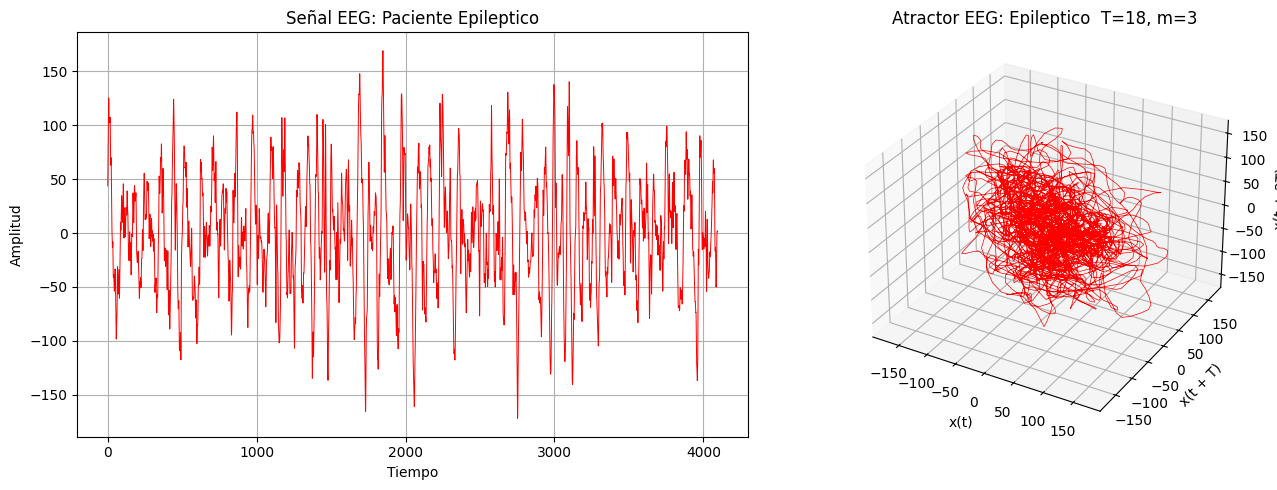

Exponente de Lyapunov estimado: -0.0018


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded

def plot_eeg_and_attractor(eeg_signal, embedded, tau, m, title_eeg="Señal EEG: Paciente Epileptico", title_attractor="Atractor EEG: Epileptico"):
    fig = plt.figure(figsize=(14, 5))

    # Subplot 1: Señal EEG
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(eeg_signal, lw=0.7, color='red')
    ax1.set_title(title_eeg)
    ax1.set_xlabel("Tiempo")
    ax1.set_ylabel("Amplitud")
    ax1.grid(True)

    # Subplot 2: Atractor 3D
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot(embedded[:, 0], embedded[:, 1], embedded[:, 2], lw=0.5, color='red')
    ax2.set_title(f"{title_attractor}  T={tau}, m={m}")
    ax2.set_xlabel("x(t)")
    ax2.set_ylabel("x(t + T)")
    ax2.set_zlabel("x(t + 2T)")

    plt.tight_layout()
    plt.savefig(r"C:\Users\esme_\OneDrive\Documentos\FISICA\Fisica Medica\epilepsia/grafE1.png")
    plt.show()


# --- 7. Calcular el exponente de Lyapunov (método de Rosenstein) ---
def lyapunov_exponent(embedded, tau, fs=1):
    N = len(embedded)
    k = 1  # Solo el vecino más cercano
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(embedded)
    distances, indices = nbrs.kneighbors(embedded)
    
    ln_divergence = []
    for j in range(1, min(100, N // 2)):  # Límite superior de iteraciones
        divs = []
        for i in range(N - j):
            nn_idx = indices[i][1]
            if abs(i - nn_idx) > tau:  # Evitar vecinos temporales
                if i + j < N and nn_idx + j < N:
                    dist = np.linalg.norm(embedded[i + j] - embedded[nn_idx + j])
                    if dist > 0:
                        divs.append(np.log(dist))
        if divs:
            ln_divergence.append(np.mean(divs))
        else:
            ln_divergence.append(0)

    ln_divergence = np.array(ln_divergence)
    t = np.arange(len(ln_divergence)) / fs
    linear_region = slice(5, 25)
    coeffs = np.polyfit(t[linear_region], ln_divergence[linear_region], 1)
    l_exp = coeffs[0]
    
    return l_exp

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/E4/E4_1.txt" 
    eeg_signal = load_eeg_from_txt(file_path)


    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)

    plot_eeg_and_attractor(eeg_signal, embedded, tau, m)

    
    l_exp = lyapunov_exponent(embedded, tau)
    print(f"Exponente de Lyapunov estimado: {l_exp:.4f}")


In [108]:
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# --- 1. Cargar señal EEG ---
def load_eeg_from_txt(file_path):
    with open(file_path, 'r') as file:
        signal = np.loadtxt(file)
    return signal

# --- 2. Calcular τ con autocorrelación (evitando división por cero) ---
def calculate_tau(signal, max_tau=100):
    signal_normalized = signal - np.mean(signal)
    autocorr = np.correlate(signal_normalized, signal_normalized, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Lags positivos
    first_zero = np.where(autocorr <= 0)[0]
    tau = first_zero[0] if len(first_zero) > 0 else 1
    return min(tau, max_tau)  # Limitar τ a max_tau

# --- 3. Calcular m con FNN (manejo de errores) ---
def estimate_m(signal, tau, max_m=10):
    def false_nearest_neighbors(signal, tau, m):
        embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
        if len(embedded) < 2:  # Evitar casos con pocos puntos
            return 1.0
        nbrs = NearestNeighbors(n_neighbors=2).fit(embedded)
        distances, _ = nbrs.kneighbors(embedded)
        with np.errstate(divide='ignore', invalid='ignore'):  # Ignorar divisiones por cero
            ratios = np.where(distances[:, 0] > 0, distances[:, 1] / distances[:, 0], np.inf)
        return np.mean(ratios > 1.5)
    
    fnn_ratios = [false_nearest_neighbors(signal, tau, m) for m in range(1, max_m + 1)]
    m_opt = np.argmin(fnn_ratios) + 1
    return max(m_opt, 3)  # Forzar m ≥ 3 para visualización 3D

# --- 4. Reconstruir atractor ---
def reconstruct_attractor(signal, tau, m):
    embedded = np.array([signal[i:i + m * tau:tau] for i in range(len(signal) - (m - 1) * tau)])
    return embedded


# --- 7. Calcular el exponente de Lyapunov (método de Rosenstein) ---
def lyapunov_exponent(embedded, tau, fs=1):
    N = len(embedded)
    k = 1  # Solo el vecino más cercano
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(embedded)
    distances, indices = nbrs.kneighbors(embedded)
    
    ln_divergence = []
    for j in range(1, min(100, N // 2)):  # Límite superior de iteraciones
        divs = []
        for i in range(N - j):
            nn_idx = indices[i][1]
            if abs(i - nn_idx) > tau:  # Evitar vecinos temporales
                if i + j < N and nn_idx + j < N:
                    dist = np.linalg.norm(embedded[i + j] - embedded[nn_idx + j])
                    if dist > 0:
                        divs.append(np.log(dist))
        if divs:
            ln_divergence.append(np.mean(divs))
        else:
            ln_divergence.append(0)

    ln_divergence = np.array(ln_divergence)
    t = np.arange(len(ln_divergence)) / fs
    linear_region = slice(5, 25)
    coeffs = np.polyfit(t[linear_region], ln_divergence[linear_region], 1)
    l_exp = coeffs[0]
    
    return l_exp

# --- PROGRAMA PRINCIPAL ---
if __name__ == "__main__":
    file_path = "C:/Users/esme_/OneDrive/Documentos/FISICA/Fisica Medica/epilepsia/H4/H4_19.txt" 
    eeg_signal = load_eeg_from_txt(file_path)


    tau = calculate_tau(eeg_signal)
    m = estimate_m(eeg_signal, tau)
    print(f"Parámetros calculados: τ (retraso) = {tau}, m (dimensión) = {m}")
    
    embedded = reconstruct_attractor(eeg_signal, tau, m)

    
    l_exp = lyapunov_exponent(embedded, tau)
    print(f"Exponente de Lyapunov estimado: {l_exp:.4f}")


Parámetros calculados: τ (retraso) = 27, m (dimensión) = 3
Exponente de Lyapunov estimado: -0.0056
